In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Importing dataset
dt = pd.read_csv('Admission_Predict_Dataset.csv')
dt.head()


Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65

In [5]:
dt.describe()

Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  500.000000  500.000000   500.000000         500.000000  500.000000   
mean   250.500000  316.472000   107.192000           3.114000    3.374000   
std    144.481833   11.295148     6.081868           1.143512    0.991004   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    125.750000  308.000000   103.000000           2.000000    2.500000   
50%    250.500000  317.000000   107.000000           3.000000    3.500000   
75%    375.250000  325.000000   112.000000           4.000000    4.000000   
max    500.000000  340.000000   120.000000           5.000000    5.000000   

            LOR         CGPA    Research  Chance of Admit   
count  500.00000  500.000000  500.000000         500.00000  
mean     3.48400    8.576440    0.560000           0.72174  
std      0.92545    0.604813    0.496884           0.14114  
min      1.00000    6.800000    0.000000           0.34000  
25%      3.00000    8.127500    0.000000           0.63000  
50%      3.50000    8.560000    1.000000           0.72000  
75%      4.00000    9.040000    1.000000           0.82000  
max      5.00000    9.920000    1.000000           0.97000

## Analysis of Data

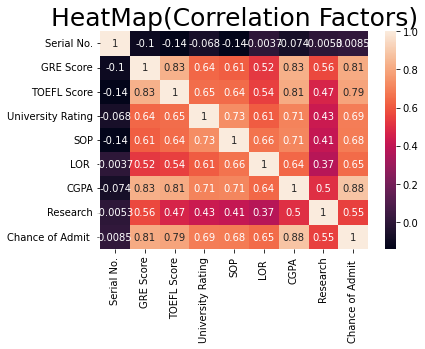

In [33]:
sns.heatmap(dt.corr(), annot=True).set_title('HeatMap(Correlation Factors)', color='black', size='25')
plt.show()

1) GRE Scores


In [7]:
GRE_score = pd.DataFrame(dt['GRE Score'])
GRE_score.describe()

GRE Score
count  500.000000
mean   316.472000
std     11.295148
min    290.000000
25%    308.000000
50%    317.000000
75%    325.000000
max    340.000000

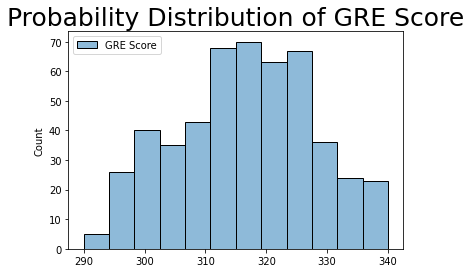

In [32]:
# Probability Distribution of GRE Score

sns.histplot(GRE_score).set_title('Probability Distribution of GRE Score', color='black', size='25')
plt.show()

2) TOEFL scores

In [9]:
TOEFL_Score = pd.DataFrame(dt['TOEFL Score'])
TOEFL_Score.describe()

TOEFL Score
count   500.000000
mean    107.192000
std       6.081868
min      92.000000
25%     103.000000
50%     107.000000
75%     112.000000
max     120.000000

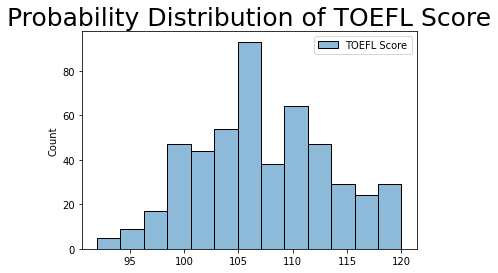

In [31]:
# Probability Distribution of TOEFL Score

sns.histplot(TOEFL_Score).set_title('Probability Distribution of TOEFL Score', color='black', size='25')
plt.show()

3) University Rating

In [11]:
University_Rating = dt.groupby(['University Rating']).count()
University_Rating = University_Rating['GRE Score']
University_Rating = pd.DataFrame(University_Rating)
University_Rating.rename({'GRE Score': 'No of institutes'}, inplace=True, axis=1)
University_Rating

No of institutes
University Rating                  
1                                34
2                               126
3                               162
4                               105
5                                73

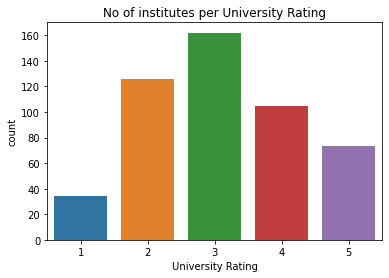

In [30]:
sns.countplot(x='University Rating', data=dt).set_title('No of institutes per University Rating')
plt.show()

4) SOP

In [13]:
SOP_score = dt.groupby(['SOP']).count()['GRE Score']
SOP_score = pd.DataFrame(SOP_score)
SOP_score

GRE Score
SOP           
1.0          6
1.5         25
2.0         43
2.5         64
3.0         80
3.5         88
4.0         89
4.5         63
5.0         42

5) LOR


In [23]:
# LOR_score = dt.groupby(['LOR']).count()['GRE Score']
# LOR_score = pd.DataFrame(LOR_score)
# LOR_score.rename({'GRE Score':'Count'}, axis=1, inplace=True)
# LOR_score

6. Research

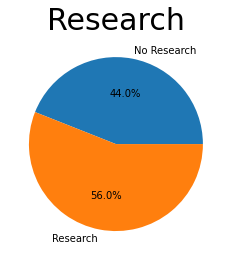

In [18]:
RES_Count = dt.groupby(['Research']).count()
RES_Count = RES_Count['GRE Score']
RES_Count = pd.DataFrame(RES_Count)
RES_Count.rename({'GRE Score': 'Count'}, axis=1, inplace=True)
RES_Count.rename({0: 'No Research', 1:'Research'}, axis=0, inplace=True)
plt.pie(x=RES_Count['Count'], labels=RES_Count.index, autopct='%1.1f%%')
plt.title('Research', pad=5, size=30)
plt.show()

7. CGPA

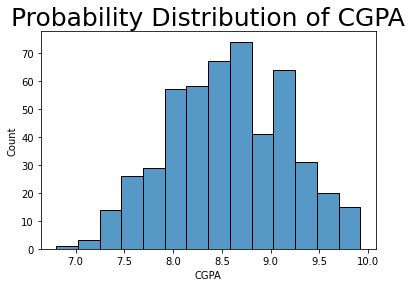

In [29]:
sns.histplot(dt['CGPA']).set_title('Probability Distribution of CGPA', color='black', size='25')
plt.show()

8. Chance of Admit

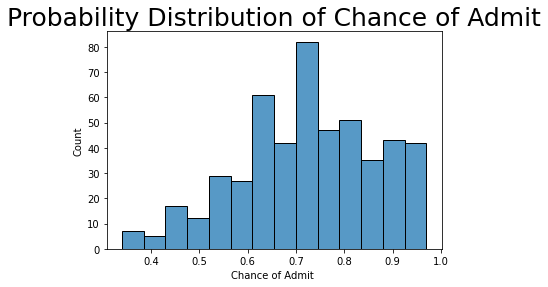

In [28]:
sns.histplot(dt['Chance of Admit ']).set_title('Probability Distribution of Chance of Admit', color='black', size='25')
plt.show()

In [35]:
X = dt.drop(['Chance of Admit '], axis=1)
y = dt['Chance of Admit ']
X.shape, y.shape

((500, 8), (500,))

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[['GRE Score', 'CGPA', 'TOEFL Score']] = scaler.fit_transform(X[['GRE Score', 'CGPA', 'TOEFL Score']])

In [37]:
X.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR       CGPA  \
0           1   1.819238     1.778865                  4  4.5   4.5  1.776806   
1           2   0.667148    -0.031601                  4  4.0   4.5  0.485859   
2           3  -0.041830    -0.525364                  3  3.0   3.5 -0.954043   
3           4   0.489904     0.462163                  3  3.5   2.5  0.154847   
4           5  -0.219074    -0.689952                  2  2.0   3.0 -0.606480   

   Research  
0         1  
1         1  
2         1  
3         1  
4         0

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 8), (100, 8), (400,), (100,))

In [41]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [42]:
lr.fit(X_train, y_train)

LinearRegression()

In [61]:
y_pred = lr.predict(X_test)
y_pred = y_pred.round(2)

In [56]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

Actual  Predicted
90     0.64       0.65
254    0.85       0.84
283    0.80       0.78
445    0.91       0.90
461    0.68       0.62
..      ...        ...
372    0.95       0.96
56     0.64       0.53
440    0.53       0.56
60     0.48       0.58
208    0.64       0.61

[100 rows x 2 columns]

In [62]:
from sklearn.metrics import f1_score

score = f1_score(y_test, y_pred, average='micro', labels=None)

ValueError: continuous is not supported